In [2]:
import scipy.stats as ss
import statistics as stats
import pandas as pd
import seaborn as sb

### Load data from salary.csv

In [3]:
data = pd.read_csv("Salary.csv")
salaries = data['salary']
years = data['exp']

In [4]:
data.head()  # first 5 rows 

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
stats.mean(salaries)

83945.6

In [6]:
stats.median(salaries)

81363

In [7]:
stats.variance(salaries)

1034437534.7176471

In [8]:
stats.stdev(salaries)

32162.67300330691

In [11]:
ss.skew(salaries)

0.1999389188655196

In [12]:
ss.kurtosis(salaries)

-1.3904143013696357

In [9]:
ss.iqr(salaries)

56204.5

<Axes: xlabel='salary', ylabel='Density'>

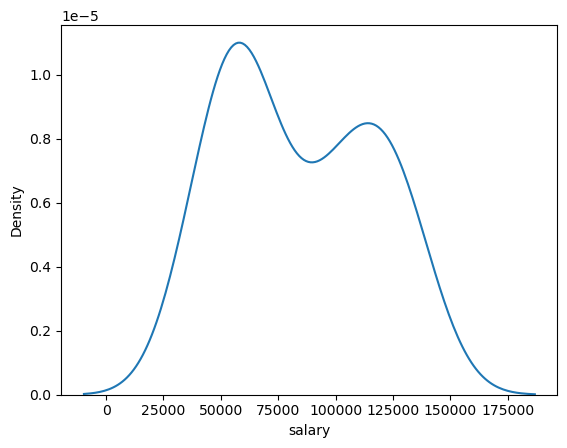

In [10]:
sb.kdeplot(salaries)

<Axes: xlabel='exp', ylabel='Density'>

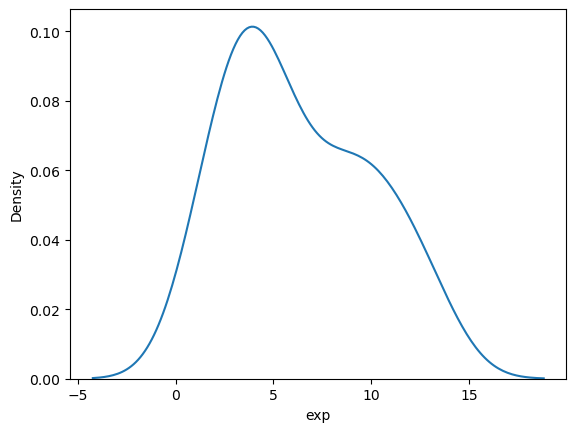

In [11]:
sb.kdeplot(years)

In [12]:
r, p = ss.pearsonr(years, salaries)

In [13]:
print(f"{r:.2f}, {p:.6f}")

0.98, 0.000000


<Axes: xlabel='exp', ylabel='salary'>

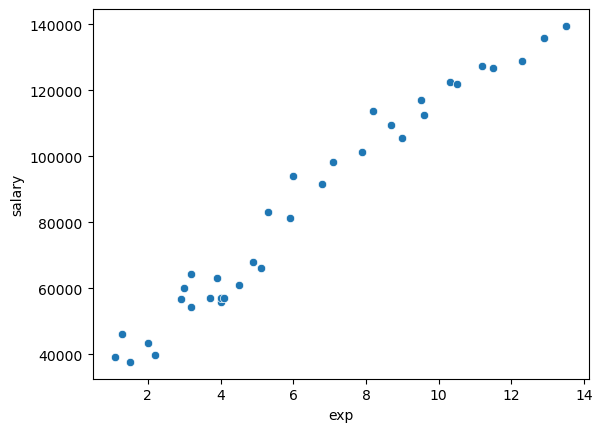

In [14]:
sb.scatterplot(data = data, x = 'exp', y = 'salary')

In [15]:
lr = ss.linregress(years,salaries)

In [16]:
lr

LinregressResult(slope=8731.941047062493, intercept=28859.526194531463, rvalue=0.9824272546479687, pvalue=1.230990588992434e-25, stderr=288.7831574622116, intercept_stderr=2092.797131099845)

In [20]:
x_years  = [2,8,6,5,4]
exp_sals = []
for x in x_years:
   exp_sals.append(lr.intercept + x * lr.slope)

In [21]:
exp_sals

[46323.40828865645,
 98715.05457103142,
 81251.17247690642,
 72519.23142984393,
 63787.29038278144]

### Compare actual with expected

In [22]:
exp_sals = []
for exp in years:
   exp_sals.append(lr.intercept + exp * lr.slope)

In [23]:
ds = pd.DataFrame( {'exp' : years, 'exp_sal' : exp_sals, 'act_sal' : salaries})

In [32]:
ds.head()

,exp,exp_sal,act_sal
0,1.1,38464.661346,39343
1,1.3,40211.049556,46205
2,1.5,41957.437765,37731
3,2.0,46323.408289,43525
4,2.2,48069.796498,39891


<Axes: xlabel='exp', ylabel='act_sal'>

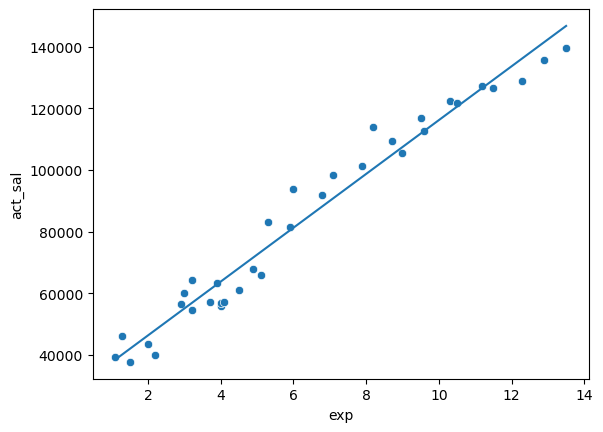

In [24]:
# Compare exp with actual 
sb.scatterplot(x='exp', y='act_sal', data = ds)
sb.lineplot(x='exp', y='exp_sal',data= ds)  